In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

In [ ]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/data/split_data/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 806 images belonging to 3 classes.


In [ ]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/data/split_data/validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

Found 102 images belonging to 3 classes.


In [ ]:
# test data
test_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/data/split_data/test",
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
)

Found 101 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_generator, validation_data=valid_generator, epochs=10, batch_size=32, callbacks=[early_stopping])

Epoch 1/10
26/26 [==============================] - 33s 916ms/step - loss: 1.8212 - accuracy: 0.3697 - val_loss: 0.8325 - val_accuracy: 0.8137
Epoch 2/10
26/26 [==============================] - 13s 500ms/step - loss: 1.0674 - accuracy: 0.5273 - val_loss: 0.5864 - val_accuracy: 0.9608
Epoch 3/10
26/26 [==============================] - 13s 483ms/step - loss: 0.7518 - accuracy: 0.6762 - val_loss: 0.2965 - val_accuracy: 0.9510
Epoch 4/10
26/26 [==============================] - 13s 505ms/step - loss: 0.4985 - accuracy: 0.7978 - val_loss: 0.1459 - val_accuracy: 0.9706
Epoch 5/10
26/26 [==============================] - 13s 506ms/step - loss: 0.3750 - accuracy: 0.8672 - val_loss: 0.0895 - val_accuracy: 0.9804
Epoch 6/10
26/26 [==============================] - 13s 498ms/step - loss: 0.3084 - accuracy: 0.8871 - val_loss: 0.1279 - val_accuracy: 0.9510
Epoch 7/10
26/26 [==============================] - 14s 550ms/step - loss: 0.3287 - accuracy: 0.9007 - val_loss: 0.0856 - val_accuracy: 0.9706

In [ ]:
model.save('/content/drive/MyDrive/data/resnet-model1.keras')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict classes using the trained model
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

print(cm)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('\nAccuracy:', accuracy_score(true_labels, predicted_classes))
print('Precision:', precision_score(true_labels, predicted_classes, average='weighted'))
print('Recall:', recall_score(true_labels, predicted_classes, average='weighted'))
print('F1 score:', f1_score(true_labels, predicted_classes, average='weighted'))

4/4 [==============================] - 6s 916ms/step
[[33  0  2]
 [ 1 31  1]
 [ 0  0 33]]

Accuracy: 0.9603960396039604
Precision: 0.9625800815375655
Recall: 0.9603960396039604
F1 score: 0.9605171114937581


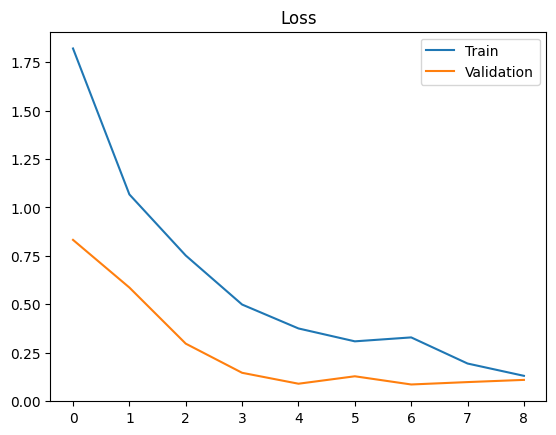

In [ ]:
import matplotlib.pyplot as plt

loss_train_curve = history.history["loss"]
loss_val_curve = history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

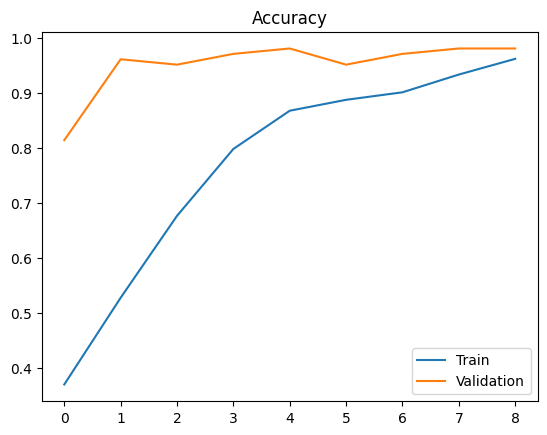

In [ ]:
acc_train_curve = history.history["accuracy"]
acc_val_curve = history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()